In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
train_data = pd.read_csv('sample_data/mnist_train_small.csv', encoding='utf-8')
test_data = pd.read_csv('sample_data/mnist_test.csv', encoding='utf=8')
print(train_data.head(5))
print(test_data.head(5))

   6  0  0.1  0.2  0.3  0.4  ...  0.585  0.586  0.587  0.588  0.589  0.590
0  5  0    0    0    0    0  ...      0      0      0      0      0      0
1  7  0    0    0    0    0  ...      0      0      0      0      0      0
2  9  0    0    0    0    0  ...      0      0      0      0      0      0
3  5  0    0    0    0    0  ...      0      0      0      0      0      0
4  2  0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]
   7  0  0.1  0.2  0.3  0.4  ...  0.662  0.663  0.664  0.665  0.666  0.667
0  2  0    0    0    0    0  ...      0      0      0      0      0      0
1  1  0    0    0    0    0  ...      0      0      0      0      0      0
2  0  0    0    0    0    0  ...      0      0      0      0      0      0
3  4  0    0    0    0    0  ...      0      0      0      0      0      0
4  1  0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]


In [9]:
train_labels = np.array(train_data['6'])
train_images = np.array(train_data.drop('6', axis = 1)).T
test_labels = np.array(test_data['7'])
test_images = np.array(test_data.drop('7', axis = 1)).T

In [10]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(784, 19999)
(19999,)
(784, 9999)
(9999,)


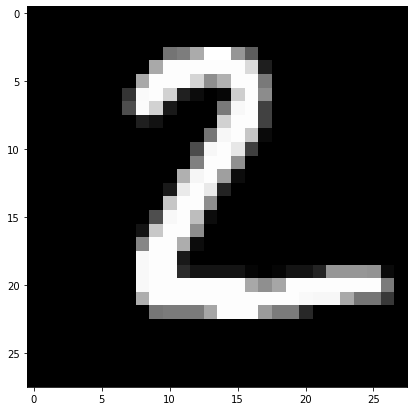

Number shown:  2


In [11]:
plt.figure(figsize = (7,7))
idx = 0

grid_data = test_images[:,idx].reshape(28,28)
plt.imshow(grid_data, cmap = "gray")
plt.show()

print("Number shown: ", test_labels[idx])

In [12]:
m = train_labels.shape[0]
m_test = test_labels.shape[0]
print("Training examples 'm': ",m)
print("Test examples 'm_test': ",m_test)
X = train_images/255
X_test = test_images/255
print("X.shape = ",X.shape)
print("X_test.shape = ", X_test.shape)
print(train_labels.shape)

Training examples 'm':  19999
Test examples 'm_test':  9999
X.shape =  (784, 19999)
X_test.shape =  (784, 9999)
(19999,)


In [13]:
#print(train_labels.max())
#print(train_labels)
nums_train = np.unique(train_labels)
nums_test = np.unique(test_labels)
print("Numbers in train images = ", nums_train)
print("Numbers in test images = ", nums_test)
flag = np.array_equal(nums_train, nums_test)
print("Numbers in test and train are common?: ", flag)
assert (flag), 'train_labels != test_labels_'
numbers = nums_train

Numbers in train images =  [0 1 2 3 4 5 6 7 8 9]
Numbers in test images =  [0 1 2 3 4 5 6 7 8 9]
Numbers in test and train are common?:  True


In [14]:
nClass = len(numbers)
print("No. of classes: ", nClass)


No. of classes:  10


In [15]:
def one_hot(nClass, labels):
    one_hot_labels = np.eye(nClass)[labels.reshape(-1)].T
    return one_hot_labels

In [16]:
Y_hot = one_hot(nClass, train_labels)
Y_test_hot = one_hot(nClass, test_labels)
print('Y_hot.shape = ', Y_hot.shape)
print('Y_test_hot.shape = ', Y_test_hot.shape)

Y_hot.shape =  (10, 19999)
Y_test_hot.shape =  (10, 9999)


In [17]:
nLayers = 4
nodes = np.array([X.shape[0], 512, 128, 32, 10])
print(nodes)

[784 512 128  32  10]


In [18]:
def initialize():
  global W,b
  W = {}
  b = {}
  for l in range(1,nLayers+1):
    W[str(l)] = np.random.randn(nodes[l], nodes[l-1])*np.sqrt(2/nodes[l-1])
    b[str(l)] = np.zeros((nodes[l],1))




In [19]:
initialize()

In [20]:
for l in range(1, nLayers+1):
  print(f"W[{l}] =", W[str(l)].shape)
  print(f'b[{l}] =', b[str(l)].shape)
  print('\n')

W[1] = (512, 784)
b[1] = (512, 1)


W[2] = (128, 512)
b[2] = (128, 1)


W[3] = (32, 128)
b[3] = (32, 1)


W[4] = (10, 32)
b[4] = (10, 1)




In [21]:
def relu(z):
  a = np.maximum(0,z)
  return a

In [22]:
def softmax(z):
  return np.exp(z) / (np.sum(np.exp(z), keepdims=True, axis=0))

In [23]:
def deriv_relu(da,z):
  dz = np.array(da, copy=True)
  dz[z<=0] = 0
  dz[z>0] = 1
  return dz

In [24]:
def forward_prop():
  global A, Z
  A = {}
  Z = {}
  A[str(0)] = X
  for l in range(1,nLayers):
    Z[str(l)] = np.dot(W[str(l)], A[str(l-1)]) +  b[str(l)]
    A[str(l)] = relu(Z[str(l)])
  Z[str(nLayers)] = np.dot(W[str(nLayers)], A[str(nLayers-1)]) +  b[str(nLayers)]
  A[str(nLayers)] = softmax(Z[str(nLayers)])

In [25]:
forward_prop()

In [26]:
for l in range(nLayers+1):
  print(f"A[{l}] =", A[str(l)].shape)
print('\n')
for l in range(1, nLayers+1):
  print(f'Z[{l}] =', Z[str(l)].shape)

A[0] = (784, 19999)
A[1] = (512, 19999)
A[2] = (128, 19999)
A[3] = (32, 19999)
A[4] = (10, 19999)


Z[1] = (512, 19999)
Z[2] = (128, 19999)
Z[3] = (32, 19999)
Z[4] = (10, 19999)


In [27]:
def cost():
  global L,J
  L = -np.sum(Y_hot*np.log(A[str(nLayers)]), keepdims=True, axis=0)
  J = np.sum(L, keepdims=True, axis=1)/m


In [28]:
cost()

In [29]:
print('L.shape =', L.shape)
print('J.shape =', J.shape)

L.shape = (1, 19999)
J.shape = (1, 1)


In [30]:
def backward_prop():
  global dA, dZ, dW, db
  dA = {}
  dZ = {}
  dW = {}
  db ={}
  dZ[str(nLayers)] = A[str(nLayers)] - Y_hot
  dW[str(nLayers)] = np.dot(dZ[str(nLayers)], A[str(nLayers-1)].T) / m
  db[str(nLayers)] = np.sum(dZ[str(nLayers)], axis=1, keepdims=True) / m
  dA[str(nLayers-1)] = np.dot(W[str(nLayers)].T, dZ[str(nLayers)])

  for l in range(nLayers-1,0,-1):
    dZ[str(l)] = np.multiply(dA[str(l)] , deriv_relu(dA[str(l)], Z[str(l)]))
    dW[str(l)] = np.dot(dZ[str(l)], A[str(l-1)].T) / m
    db[str(l)] = np.sum(dZ[str(l)], axis=1, keepdims=True) / m
    dA[str(l-1)] = np.dot(W[str(l)].T, dZ[str(l)])

In [31]:
backward_prop()

In [32]:
for l in range(nLayers-1,-1,-1):
  print(f"dA[{l}] =", dA[str(l)].shape)
print('\n')
for l in range(nLayers, 0, -1):
  print(f'dZ[{l}] =', dZ[str(l)].shape)
print('\n')
for l in range(nLayers, 0, -1):
  print(f'dW[{l}] =', dW[str(l)].shape)
print('\n')
for l in range(nLayers, 0, -1):
  print(f'db[{l}] =', db[str(l)].shape)

dA[3] = (32, 19999)
dA[2] = (128, 19999)
dA[1] = (512, 19999)
dA[0] = (784, 19999)


dZ[4] = (10, 19999)
dZ[3] = (32, 19999)
dZ[2] = (128, 19999)
dZ[1] = (512, 19999)


dW[4] = (10, 32)
dW[3] = (32, 128)
dW[2] = (128, 512)
dW[1] = (512, 784)


db[4] = (10, 1)
db[3] = (32, 1)
db[2] = (128, 1)
db[1] = (512, 1)


In [33]:
def model():
  initialize()
  print("Initialization finished")
  forward_prop()
  print("Forward propagation finished")
  #print(A[str(nLayers)].shape)
  #Y_hot.shape
  cost()
  print("Cost calculated")
  backward_prop()
  print("Backward propagation finished")



In [34]:
model()

Initialization finished
Forward propagation finished
Cost calculated
Backward propagation finished


In [35]:
a = np.abs(A['4']- Y_hot)
print(f'Accuracy : {100 - np.mean(a)*100} % on Train Set')

Accuracy : 82.0787686057132 % on Train Set


In [36]:
Z_test={}
A_test={}
A_test[str(0)] = X_test
for l in range(1,nLayers):
  Z_test[str(l)] = np.dot(W[str(l)], A_test[str(l-1)]) +  b[str(l)]
  A_test[str(l)] = relu(Z_test[str(l)])

Z_test[str(nLayers)] = np.dot(W[str(nLayers)], A_test[str(nLayers-1)]) +  b[str(nLayers)]
A_test[str(nLayers)] = softmax(Z_test[str(nLayers)])

In [37]:
a_t = np.abs(A_test['4']- Y_test_hot)
print(f'Accuracy : {100 - np.mean(a_t)*100} % on Test Set')

Accuracy : 82.09855447368997 % on Test Set
